In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_text,job_state,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,Employer Provided Salary:$120K - $180K,Title: Data Scientist\nDuration: Full Time\nRe...,5.0,Hanker Systems Inc\n5.0,Remote,51 to 200 Employees,-1,Company - Private,-1,...,180,150.0,Hanker Systems Inc,Remote,2024,0,0,0,0,0
1,Junior Data Scientist,Employer Provided Salary:$80K - $100K,Club Quarters Application- US\n\nJunior Data S...,3.3,Club Quarters\n3.3,"Stamford, CT",501 to 1000 Employees,-1,Company - Private,Hotels & Resorts,...,100,90.0,Club Quarters,CT,2024,0,0,0,0,0
2,Data Scientist,Employer Provided Salary:$60.00 - $70.00 Per Hour,Skillset Required:\nSoftware Engineering Skill...,3.7,Dew Software Inc\n3.7,"Mountain View, CA",51 to 200 Employees,1997,Company - Private,Information Technology Support Services,...,70,65.0,Dew Software Inc,CA,26,1,0,0,0,0
3,Data Scientist,Employer Provided Salary:$60K - $140K,iOS: https://apps.apple.com/us/app/id155187173...,-1.0,Redvest App,Remote,-1,-1,-1,-1,...,140,100.0,Redvest App,Remote,2024,0,0,0,0,0
4,Data/ AI/ ML Developer,Employer Provided Salary:$55.00 - $60.00 Per Hour,Bachelor’s Degree in Computer Science/Computer...,5.0,Volto Consulting\n5.0,Remote,51 to 200 Employees,-1,Company - Public,-1,...,60,57.5,Volto Consulting,Remote,2024,1,0,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'age', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [5]:
df['Job Title'].value_counts()

Job Title
Data Scientist                                 208
Junior Data Scientist                           69
Junior AI Engineer                              32
Scientific Programmer/Data Scientist            31
RGM Data Scientist                              30
Data Scientist (All Levels)                     28
Data Scientist, Analytics                       28
Data Scientist or Bioinformatician (remote)     27
Data Scientist 2                                26
Data Scientist- Epidemiology                    26
Data Scientist, IOC Analytics                   26
Junior Scientific Programmer/Data Scientist     25
Associate Data Engineer                         24
Associate Data Scientist                        23
Jr. Data Scientist                              19
Data Scientist 1                                15
Applied Data Scientist                          15
Data Scientist I                                12
Data Scientist (Remote)                         10
REMOTE: Data Scientis

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
## Job title and seniority
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

job_simp
data scientist    664
na                 35
data engineer      24
Name: count, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

seniority
na    568
jr    147
sr      8
Name: count, dtype: int64

In [9]:
## Fix state
df['job_state'].value_counts()

job_state
 VA       154
Remote    103
 CA        96
 MN        75
 CT        52
 IL        34
 TX        28
 WI        27
 WA        26
 MA        22
 NC        22
 NY        20
 PA        15
 ME        13
 GA        11
 FL         9
 MO         9
 CO         2
 NJ         2
 IA         2
 TN         1
Name: count, dtype: int64

In [10]:
## Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       346
1       806
2       438
3      1168
4       938
       ... 
718     661
719     600
720     652
721     643
722     652
Name: desc_len, Length: 723, dtype: int64

In [11]:
## hourly wage to annual
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['hourly']==1 else x['min_salary'], axis=1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['hourly']==1 else x['max_salary'], axis=1)

In [12]:
df[df['hourly']==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
2,1,120,140
4,1,110,120
6,1,100,110
7,1,150,160
11,1,116,134


In [13]:
df['company_text']

0           Hanker Systems Inc
1                Club Quarters
2             Dew Software Inc
3                  Redvest App
4             Volto Consulting
                ...           
718                       Octo
719                  Beam Inc.
720    University of Minnesota
721                     Augray
722    University of Minnesota
Name: company_text, Length: 723, dtype: object

In [14]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,desc_len
count,723.000000,723.000000,723.000000,723.000000,723.00000,723.000000,723.000000,723.000000,723.000000,723.0,723.000000,723.000000,723.000000,723.000000
mean,3.798893,1574.556017,0.006916,0.455048,84.55740,126.157676,104.921853,448.443983,0.149378,0.0,0.013831,0.017981,0.016598,976.948824
std,0.787259,784.692103,0.082930,0.498320,16.75745,25.160153,20.211086,784.692103,0.356707,0.0,0.116871,0.132973,0.127846,753.907311
min,-1.000000,-1.000000,0.000000,0.000000,55.00000,60.000000,52.500000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,192.000000
25%,3.500000,1851.000000,0.000000,0.000000,70.00000,110.000000,90.000000,17.000000,0.000000,0.0,0.000000,0.000000,0.000000,652.000000
50%,3.900000,1968.000000,0.000000,0.000000,84.00000,122.000000,103.500000,55.000000,0.000000,0.0,0.000000,0.000000,0.000000,776.000000
75%,4.200000,2006.000000,0.000000,1.000000,94.00000,144.000000,117.500000,172.000000,0.000000,0.0,0.000000,0.000000,0.000000,1089.000000
max,5.000000,2018.000000,1.000000,1.000000,183.00000,221.000000,202.000000,2024.000000,1.000000,0.0,1.000000,1.000000,1.000000,8225.000000


<Axes: >

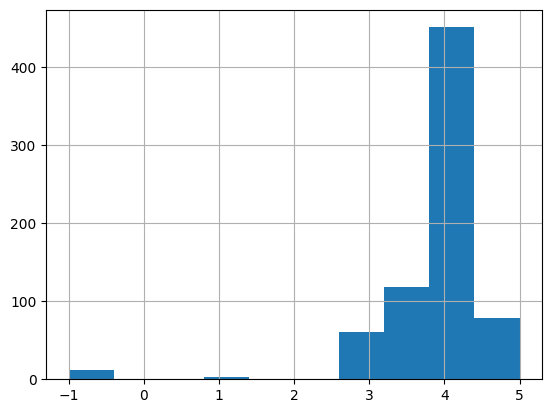

In [15]:
df.Rating.hist()

<Axes: >

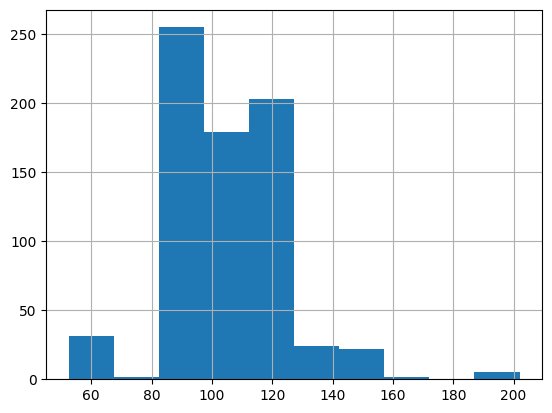

In [16]:
df.avg_salary.hist()

<Axes: >

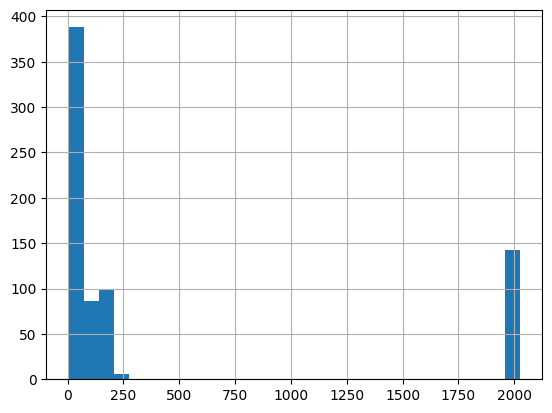

In [17]:
df.age.hist(bins=30)

<Axes: >

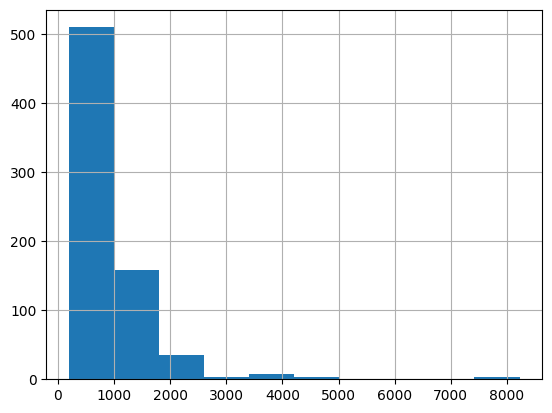

In [18]:
df.desc_len.hist()

<Axes: >

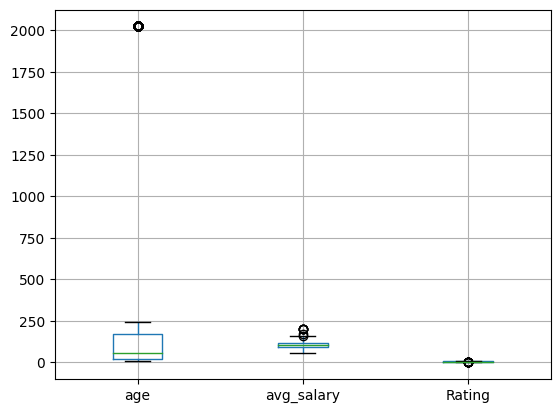

In [19]:
df.boxplot(column=['age','avg_salary','Rating'])

<Axes: >

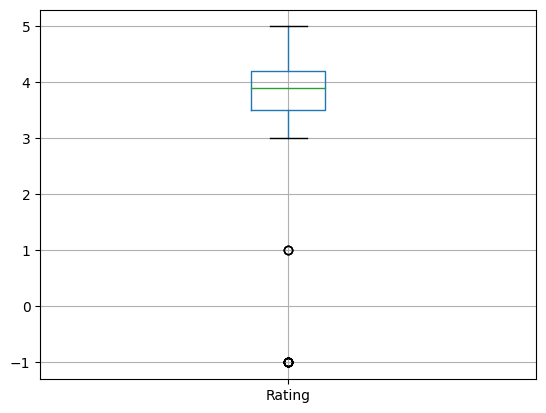

In [20]:
df.boxplot(column='Rating')

In [21]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.099203,-0.255899,-0.105325
avg_salary,0.099203,1.000000,0.196243,0.129604
Rating,-0.255899,0.196243,1.000000,-0.162210
desc_len,-0.105325,0.129604,-0.162210,1.000000


<Axes: >

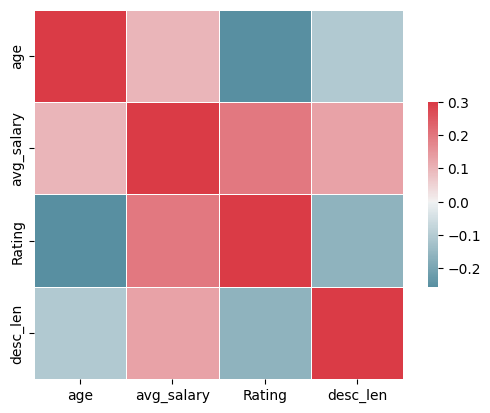

In [22]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3,center=0,square=True,
            cmap=cmap,linewidths=.5,cbar_kws={"shrink":.5})

In [23]:
df_cat = df[['Location','Size','Type of ownership','Industry','Sector','Revenue','company_text'
    ,'job_state','python_yn','r_yn','spark_yn','aws_yn','excel_yn','job_simp', 'seniority']]

graph for Location: total = 54


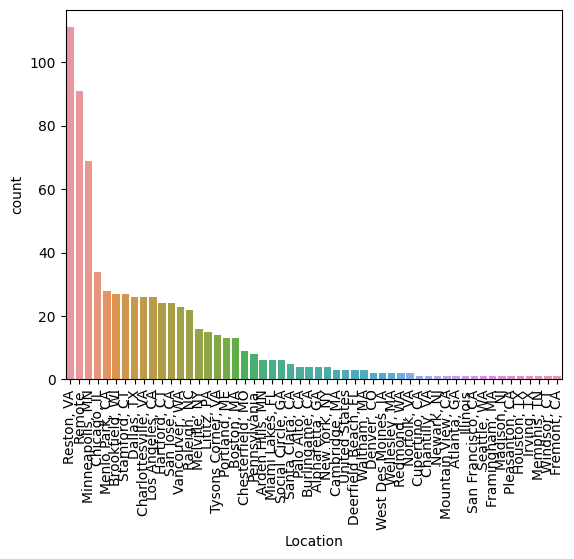

graph for Size: total = 9


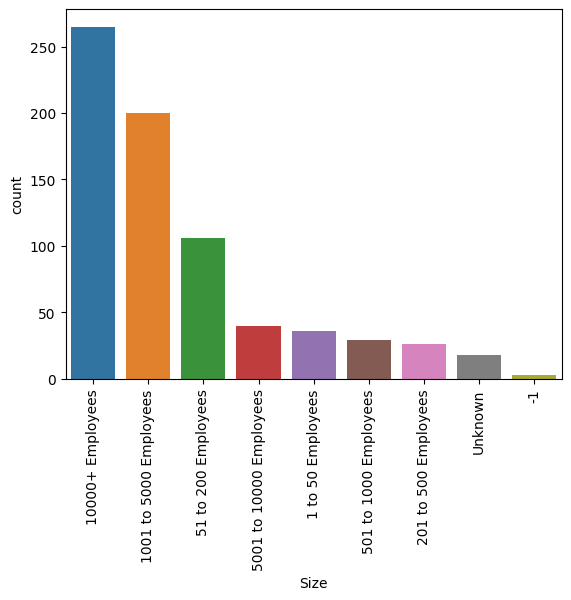

graph for Type of ownership: total = 7


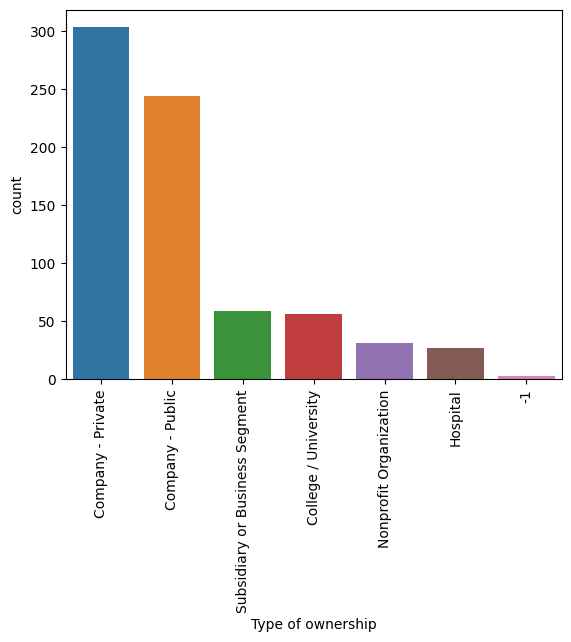

graph for Industry: total = 32


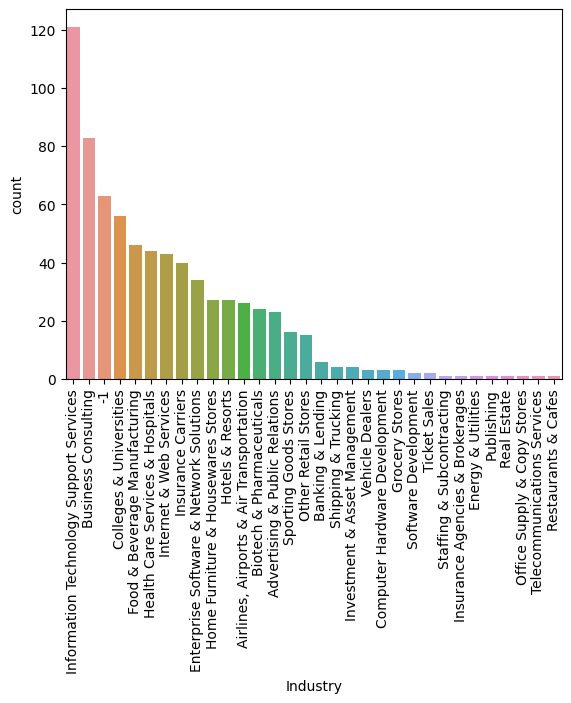

graph for Sector: total = 19


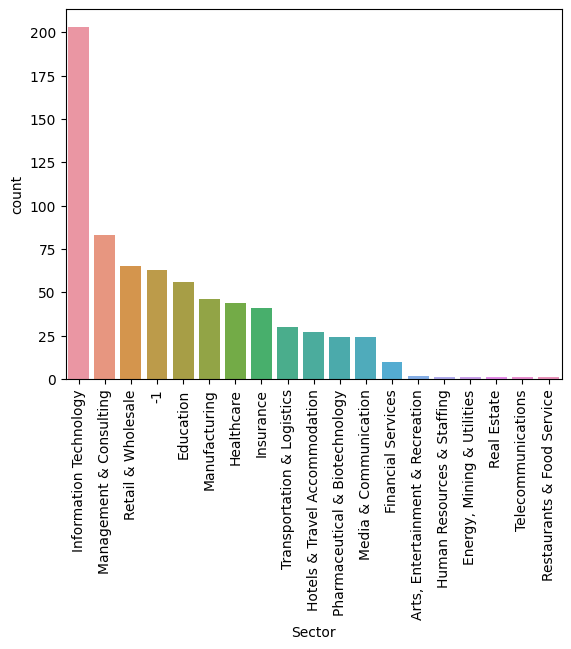

graph for Revenue: total = 11


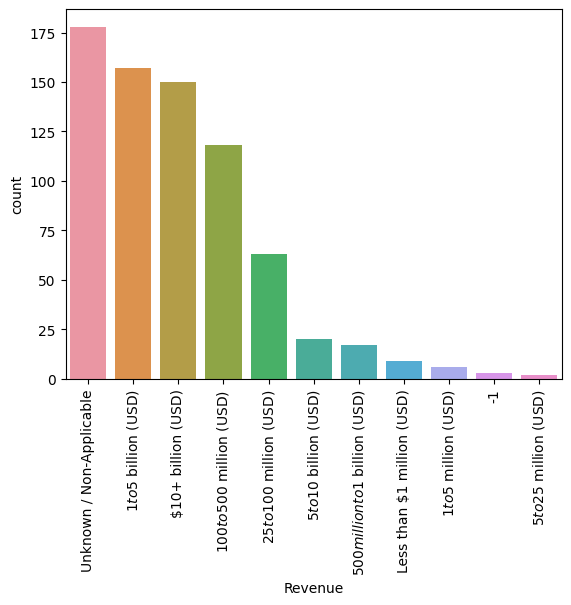

graph for company_text: total = 78


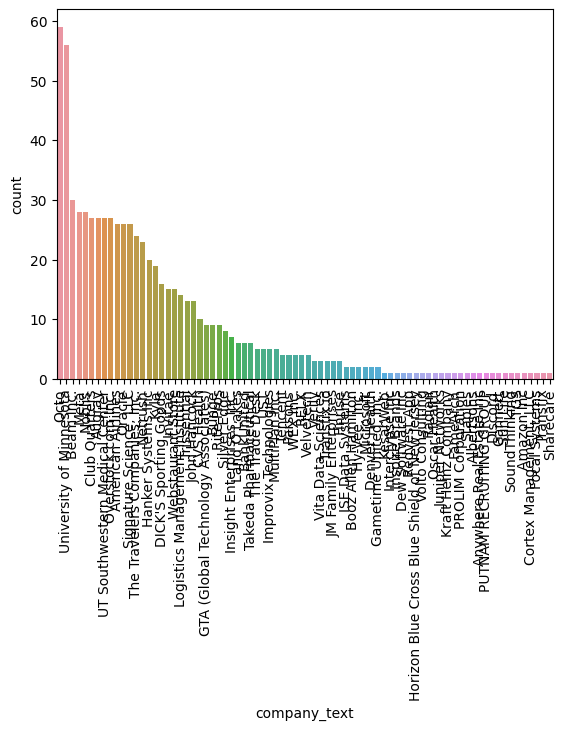

graph for job_state: total = 21


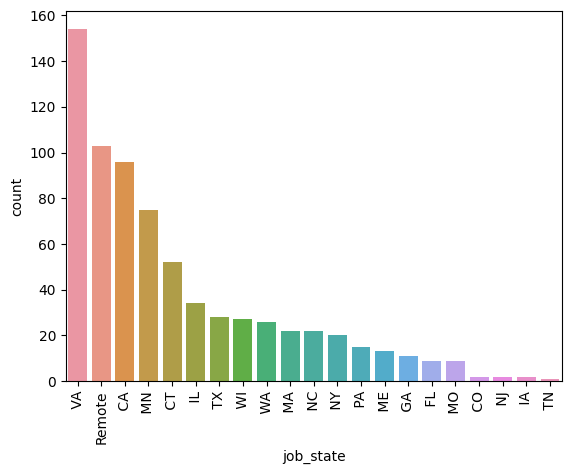

graph for python_yn: total = 2


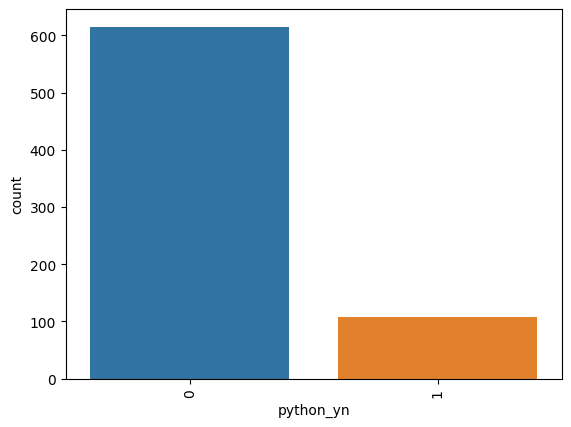

graph for r_yn: total = 1


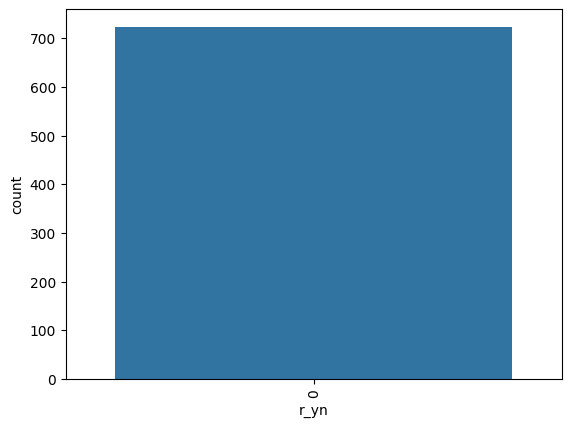

graph for spark_yn: total = 2


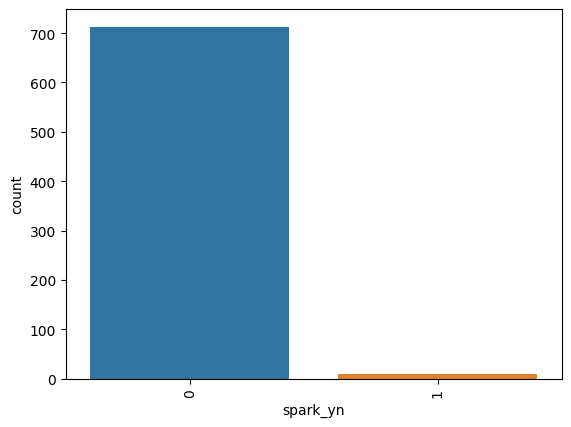

graph for aws_yn: total = 2


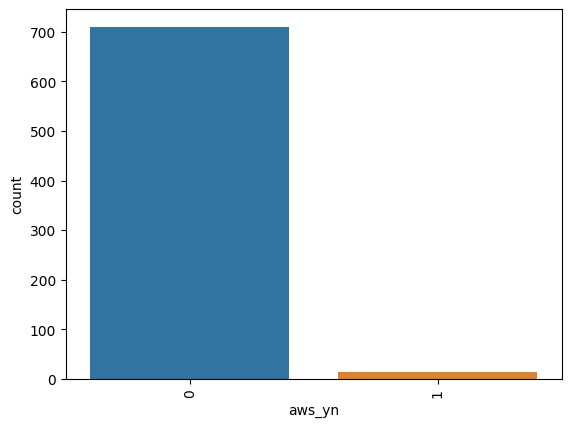

graph for excel_yn: total = 2


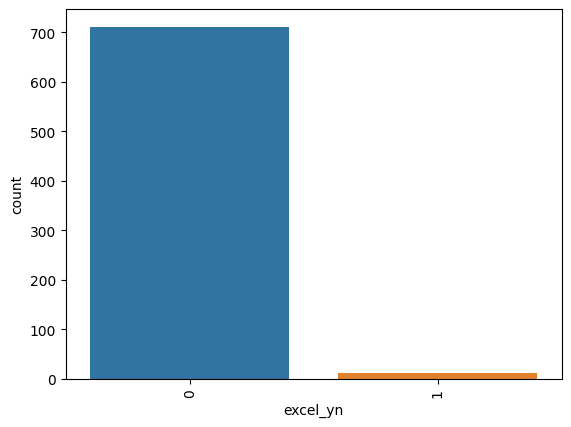

graph for job_simp: total = 3


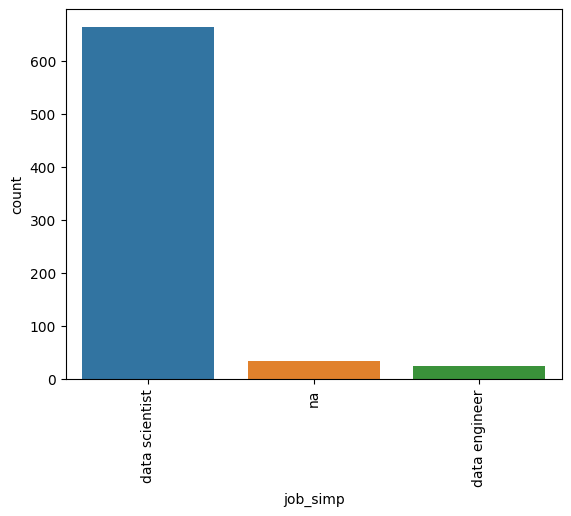

graph for seniority: total = 3


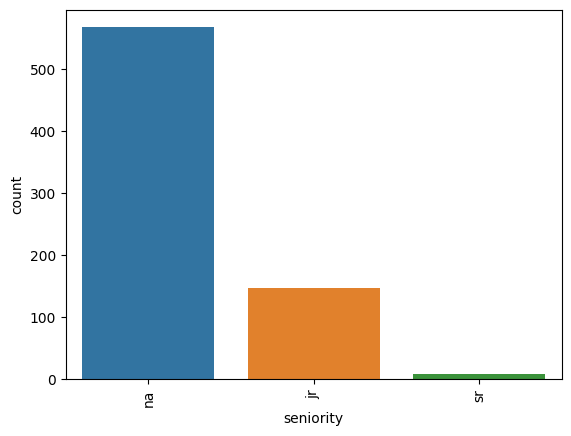

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Location: total = 20


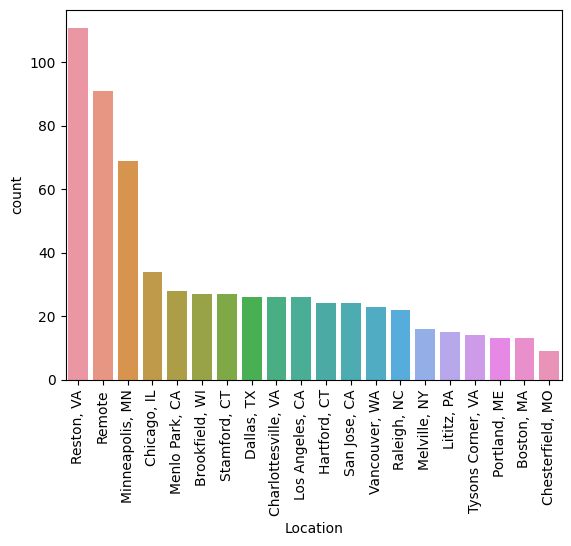

graph for company_text: total = 20


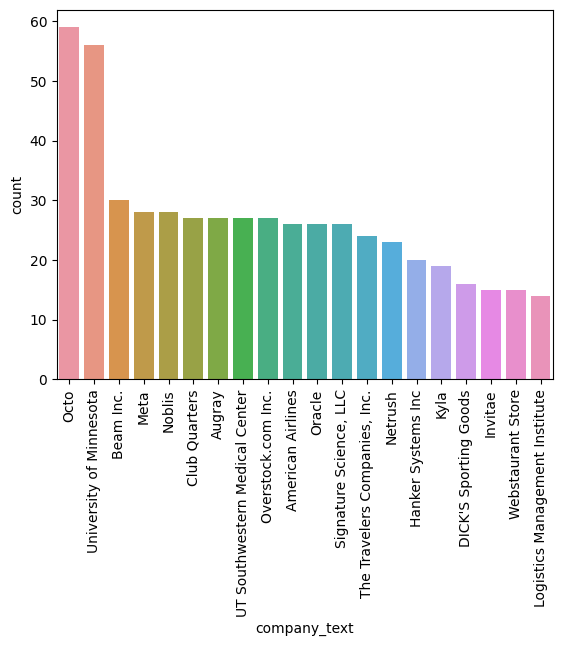

In [27]:
for i in df_cat[['Location','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [28]:
pd.pivot_table(df,index = 'job_simp' , values= 'avg_salary')

,avg_salary
job_simp,
data engineer,109.000000
data scientist,105.487952
na,91.385714


In [29]:
pd.pivot_table(df,index = ['job_simp','seniority'] , values= 'avg_salary')

avg_salary
job_simp       seniority            
data engineer  na         109.000000
data scientist jr          82.691304
               na         110.087800
               sr         122.125000
na             jr          89.500000
               na         111.500000

In [39]:
pd.pivot_table(df,index = ['job_state','job_simp'], values= 'avg_salary',aggfunc=['mean','count']).sort_values('job_state',ascending=False)

mean      count
                          avg_salary avg_salary
job_state job_simp                             
Remote    na               57.500000          1
          data scientist  111.568627        102
 WI       data scientist   57.500000         27
 WA       na              138.500000          2
          data scientist   88.854167         24
 VA       na               89.500000         32
          data scientist  112.737705        122
 TX       data scientist  112.517857         28
 TN       data scientist   97.500000          1
 PA       data scientist   90.000000         15
 NY       data scientist  100.300000         20
 NJ       data scientist  139.500000          2
 NC       data scientist   86.954545         22
 MO       data scientist  106.000000          9
 MN       data scientist   96.746667         75
 ME       data scientist   97.192308         13
 MA       data scientist  115.977273         22
 IL       data scientist  120.941176         34
 IA       data scientist  101.000000          2
 GA       data scientist  103.454545         11
 FL       data scientist  103.000000          9
 CT       data scientist   90.571429         28
          data engineer   109.000000         24
 CO       data scientist   87.500000          2
 CA       data scientist  117.854167         96

In [43]:
pd.pivot_table(df[df['job_simp']=='data scientist'],index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
NJ,139.500000
IL,120.941176
CA,117.854167
MA,115.977273
VA,112.737705
TX,112.517857
Remote,111.568627
MO,106.000000
GA,103.454545


In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'age', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'excel_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [61]:
# rating, industry, sector, revenue, hourly, employer provided, python_yn, spark_yn, aws_yn, excel_yn, desc_len, type of ownership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'desc_len', 'Type of ownership','avg_salary']]

In [65]:
pd.set_option('display.max_rows',None)

In [66]:
for i in df_pivots.columns:
    if i == 'avg_salary':
        break
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 4.3    165.750000
 5.0    141.596154
 4.5    137.500000
 4.4    117.354839
 3.4    115.064103
 1.0    112.500000
 3.6    109.250000
 3.9    106.047945
 4.7    105.950000
 4.1    104.500000
 3.8    104.159420
 4.0    103.935294
 4.6    102.500000
 4.2    102.464789
 3.1    102.243243
-1.0     99.750000
 3.7     99.333333
 3.3     92.328125
 3.0     91.145833
 3.5     88.500000
 3.2     82.500000
Industry
                                         avg_salary
Industry                                           
Telecommunications Services              171.500000
Staffing & Subcontracting                160.000000
Real Estate                              156.000000
Ticket Sales                             137.500000
Computer Hardware Development            134.666667
Insurance Agencies & Brokerages          133.000000
Internet & Web Services                  125.383721
Shipping & Trucking                      120.000000
Enterprise Software & Netwo

In [67]:
pd.pivot_table(df_pivots,index='Revenue',columns='python_yn',values='avg_salary',aggfunc='count',)

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),101.0,56.0
$1 to $5 million (USD),6.0,NaN
$10+ billion (USD),147.0,3.0
$100 to $500 million (USD),118.0,NaN
$25 to $100 million (USD),63.0,NaN
$5 to $10 billion (USD),20.0,NaN
$5 to $25 million (USD),1.0,1.0
$500 million to $1 billion (USD),17.0,NaN
-1,2.0,1.0


In [85]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

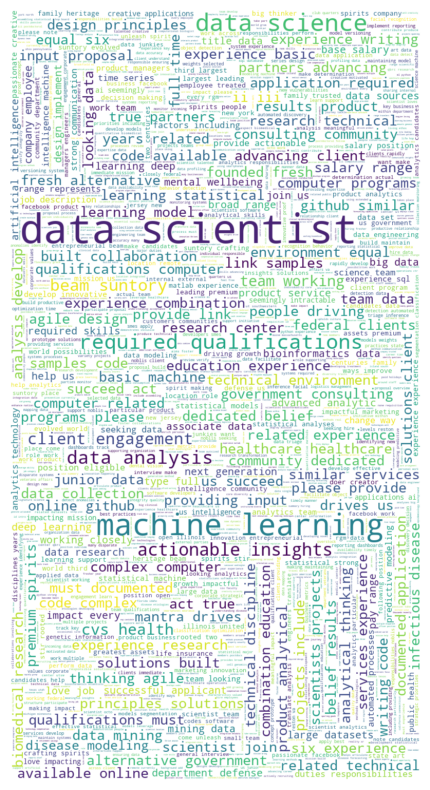

In [87]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text,preserve_line=True)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()